# COVID-19 (2019-nCoV) Outbreak in Ecuador - Exploratory Data Analysis

#### By Marcelo Ortiz Villavicencio

Data avaliable at: https://github.com/CSSEGISandData/COVID-19

## Background

The first big news in the World at the beginning of 2020 is the COVID-19 Outbreak in China, starting from Wuhan, Hubei Province in December 2019. 

As the situation evolves quickly, this notebook will be frequently updated as well.

In [1]:
# Importing libraries. Note: For replication you need to have installed this libraries. If not, please try: 
# import sys
# !{sys.executable} -m pip install plotly
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import os
import folium
from folium.plugins import HeatMap, HeatMapWithTime
import datetime as dt

## Import data

In [2]:
today_csv = dt.datetime.now().strftime("%m-%d-%Y") + '.csv'
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv' 
url_daily = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'

df_confirmed = pd.read_csv(url_confirmed)
df_death = pd.read_csv(url_deaths)
df_recovered = pd.read_csv(url_recovered)
df_daily = pd.read_csv(url_daily + today_csv)

In [3]:
# adjusting last real data for Ecuador
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/15/20'] = 37 

df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [4]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [6]:
df_daily.loc[(df_daily['Country/Region'] == 'Ecuador'), 'Confirmed'] = 37
df_daily.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-15T18:20:18,67794,3085,54288,30.9756,112.2707
1,NaN,Italy,2020-03-14T20:13:16,24747,1809,2335,41.8719,12.5674
2,NaN,Iran,2020-03-15T18:20:18,13938,724,4590,32.4279,53.6880
3,NaN,"Korea, South",2020-03-15T18:20:18,8162,75,510,35.9078,127.7669
4,NaN,Spain,2020-03-15T18:20:18,7798,289,517,40.4637,-3.7492


In [7]:
print(f"Number of Countries: {df_daily['Country/Region'].nunique()}")

Number of Countries: 147


In [8]:
# Dealing with missing values
df_confirmed.isna().sum()[df_confirmed.isna().sum() > 0]

Province/State    139
dtype: int64

In [9]:
df_recovered.isna().sum()[df_recovered.isna().sum() > 0]

Province/State    139
dtype: int64

In [10]:
df_death.isna().sum()[df_death.isna().sum() > 0]

Province/State    139
dtype: int64

In [11]:
df_confirmed = df_confirmed.fillna('unknow')
df_recovered = df_recovered.fillna('unknow')
df_death = df_death.fillna('unknow')

## Total cases in Ecuador

In [12]:
# creating a subset with confirmed cases in Ecuador
confirmed_ec = df_confirmed[df_confirmed['Country/Region'] == 'Ecuador']
confirmed_ec = confirmed_ec.groupby(confirmed_ec['Country/Region']).sum()
confirmed_ec = confirmed_ec.iloc[0][2:confirmed_ec.shape[1]]

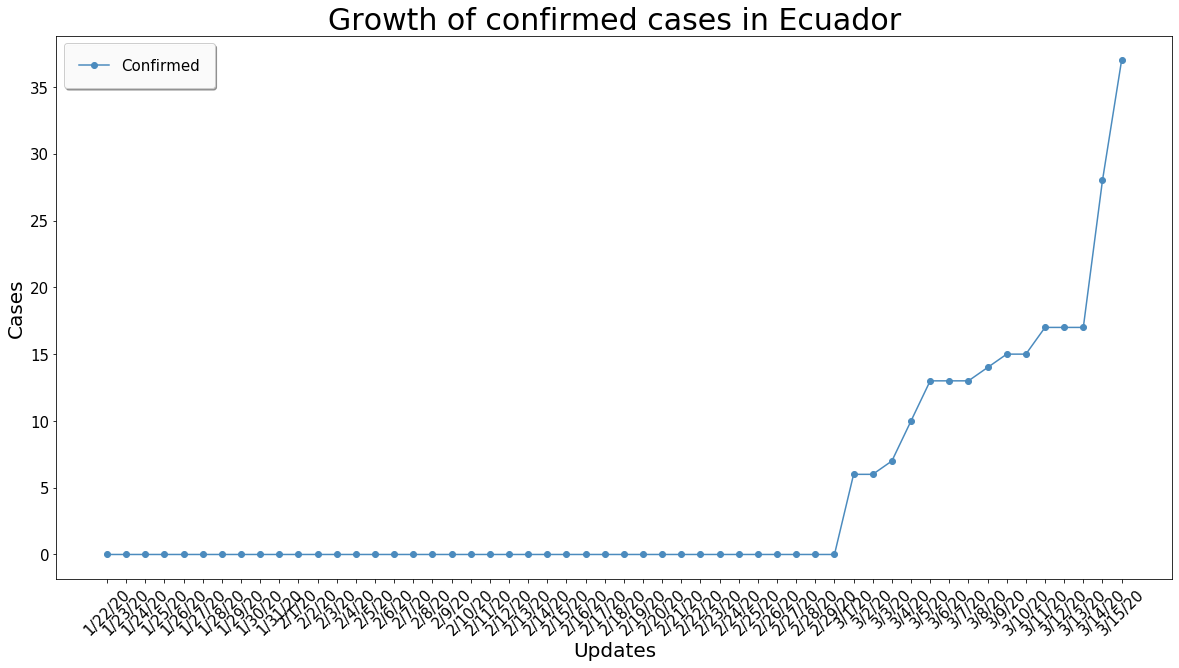

In [13]:
# set plotsize
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(confirmed_ec
        , color = '#4b8bbe'
        , label = 'Confirmed'
        , marker = 'o')

# titles parameters
plt.title('Growth of confirmed cases in Ecuador',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

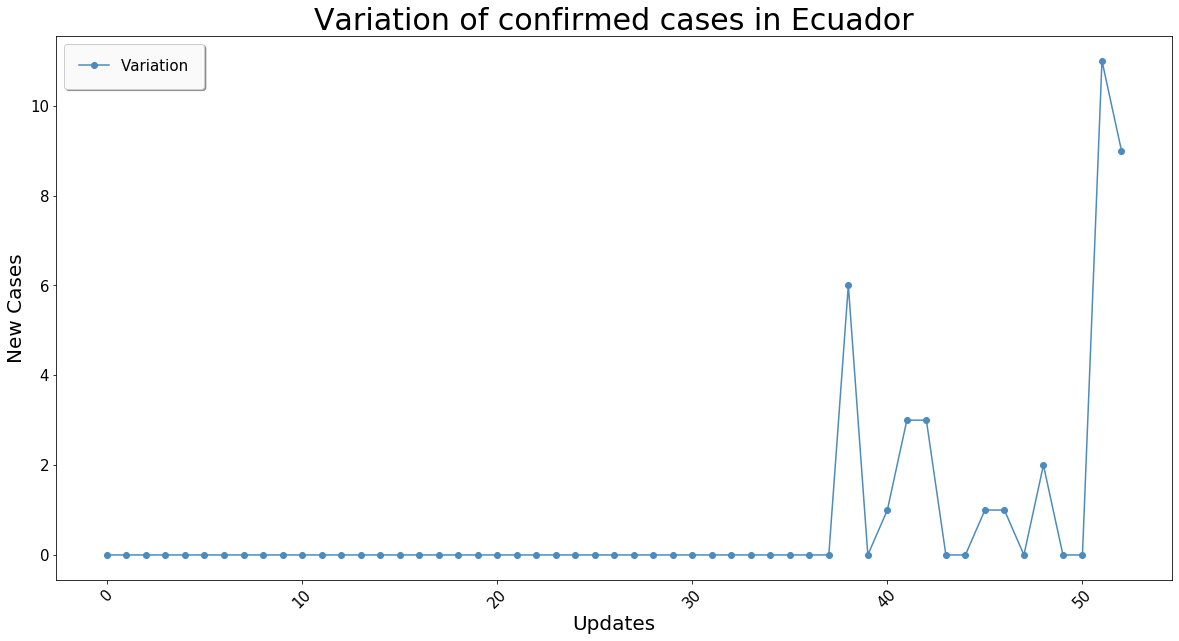

In [14]:
diff = []
for i in range(1, len(confirmed_ec)):
    value = confirmed_ec[i] - confirmed_ec[i-1]
    diff.append(value)

# set plotsize
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(diff
        , color = '#4b8bbe'
        , label = 'Variation'
        , marker = 'o')

# titles parameters
plt.title('Variation of confirmed cases in Ecuador',size=30)
plt.ylabel('New Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

In [15]:
# selecting ecuadorian cases 
ecuador_confirmed = df_confirmed[df_confirmed.columns[4:df_confirmed.shape[1]]][df_confirmed['Country/Region']=='Ecuador']
ecuador_confirmed = ecuador_confirmed.iloc[0:ecuador_confirmed.shape[0]].sum()

ecuador_recovered = df_recovered[df_recovered.columns[4:df_recovered.shape[1]]][df_recovered['Country/Region']=='Ecuador']
ecuador_recovered = ecuador_recovered.iloc[0:ecuador_recovered.shape[0]].sum()

ecuador_deaths = df_death[df_death.columns[4:df_death.shape[1]]][df_death['Country/Region']=='Ecuador']
ecuador_deaths = ecuador_deaths.iloc[0:ecuador_deaths.shape[0]].sum()

In [16]:
# creating a list with confirmed, recovered and deaths cases
list_of_tuples = list(zip(ecuador_confirmed, ecuador_recovered, ecuador_deaths)) 

# creating a dataframe with this list to plot the chart
ecuador_cases_growth = pd.DataFrame(list_of_tuples, index = ecuador_confirmed.index, columns = ['confirmed', 'recovered','deaths'])

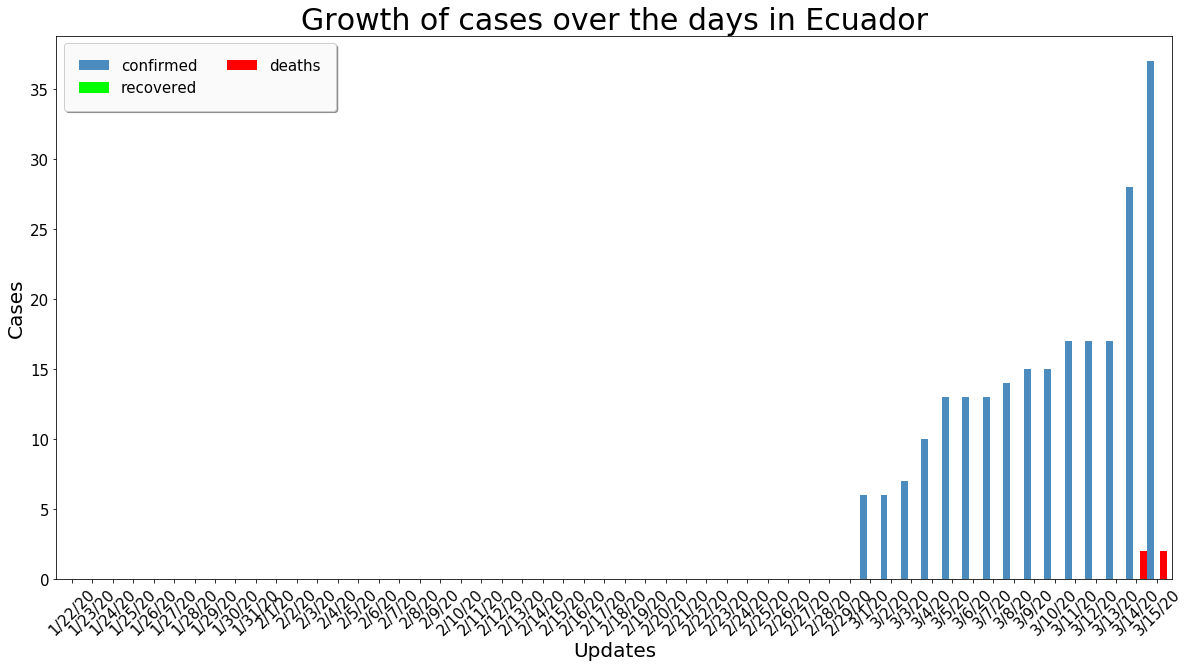

In [17]:
# creating the plot
ecuador_cases_growth.plot(kind='bar'
                                  , figsize=(20,10)
                                  , width=1
                                  , color=['#4b8bbe','lime','red']
                                  , rot=2)

# defyning title, labels, ticks and legend parameters
plt.title('Growth of cases over the days in Ecuador', size=30)
plt.xlabel('Updates', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

## Total Cases in countries different from China

In [18]:
last_update = '3/15/20'
other_countries = df_confirmed[['Country/Region','Province/State',last_update]][df_confirmed['Country/Region']!='China']
other_countries['recovered'] = df_recovered[last_update][df_recovered['Country/Region']!='China']
other_countries['deaths'] = df_death[last_update][df_death['Country/Region']!='China']

# sum the cases by country/region
other_countries = other_countries.groupby(other_countries['Country/Region']).sum()

# renaming the columns
other_countries = other_countries.rename(columns = {last_update:'confirmed','recovered':'recovered','deaths':'deaths'})

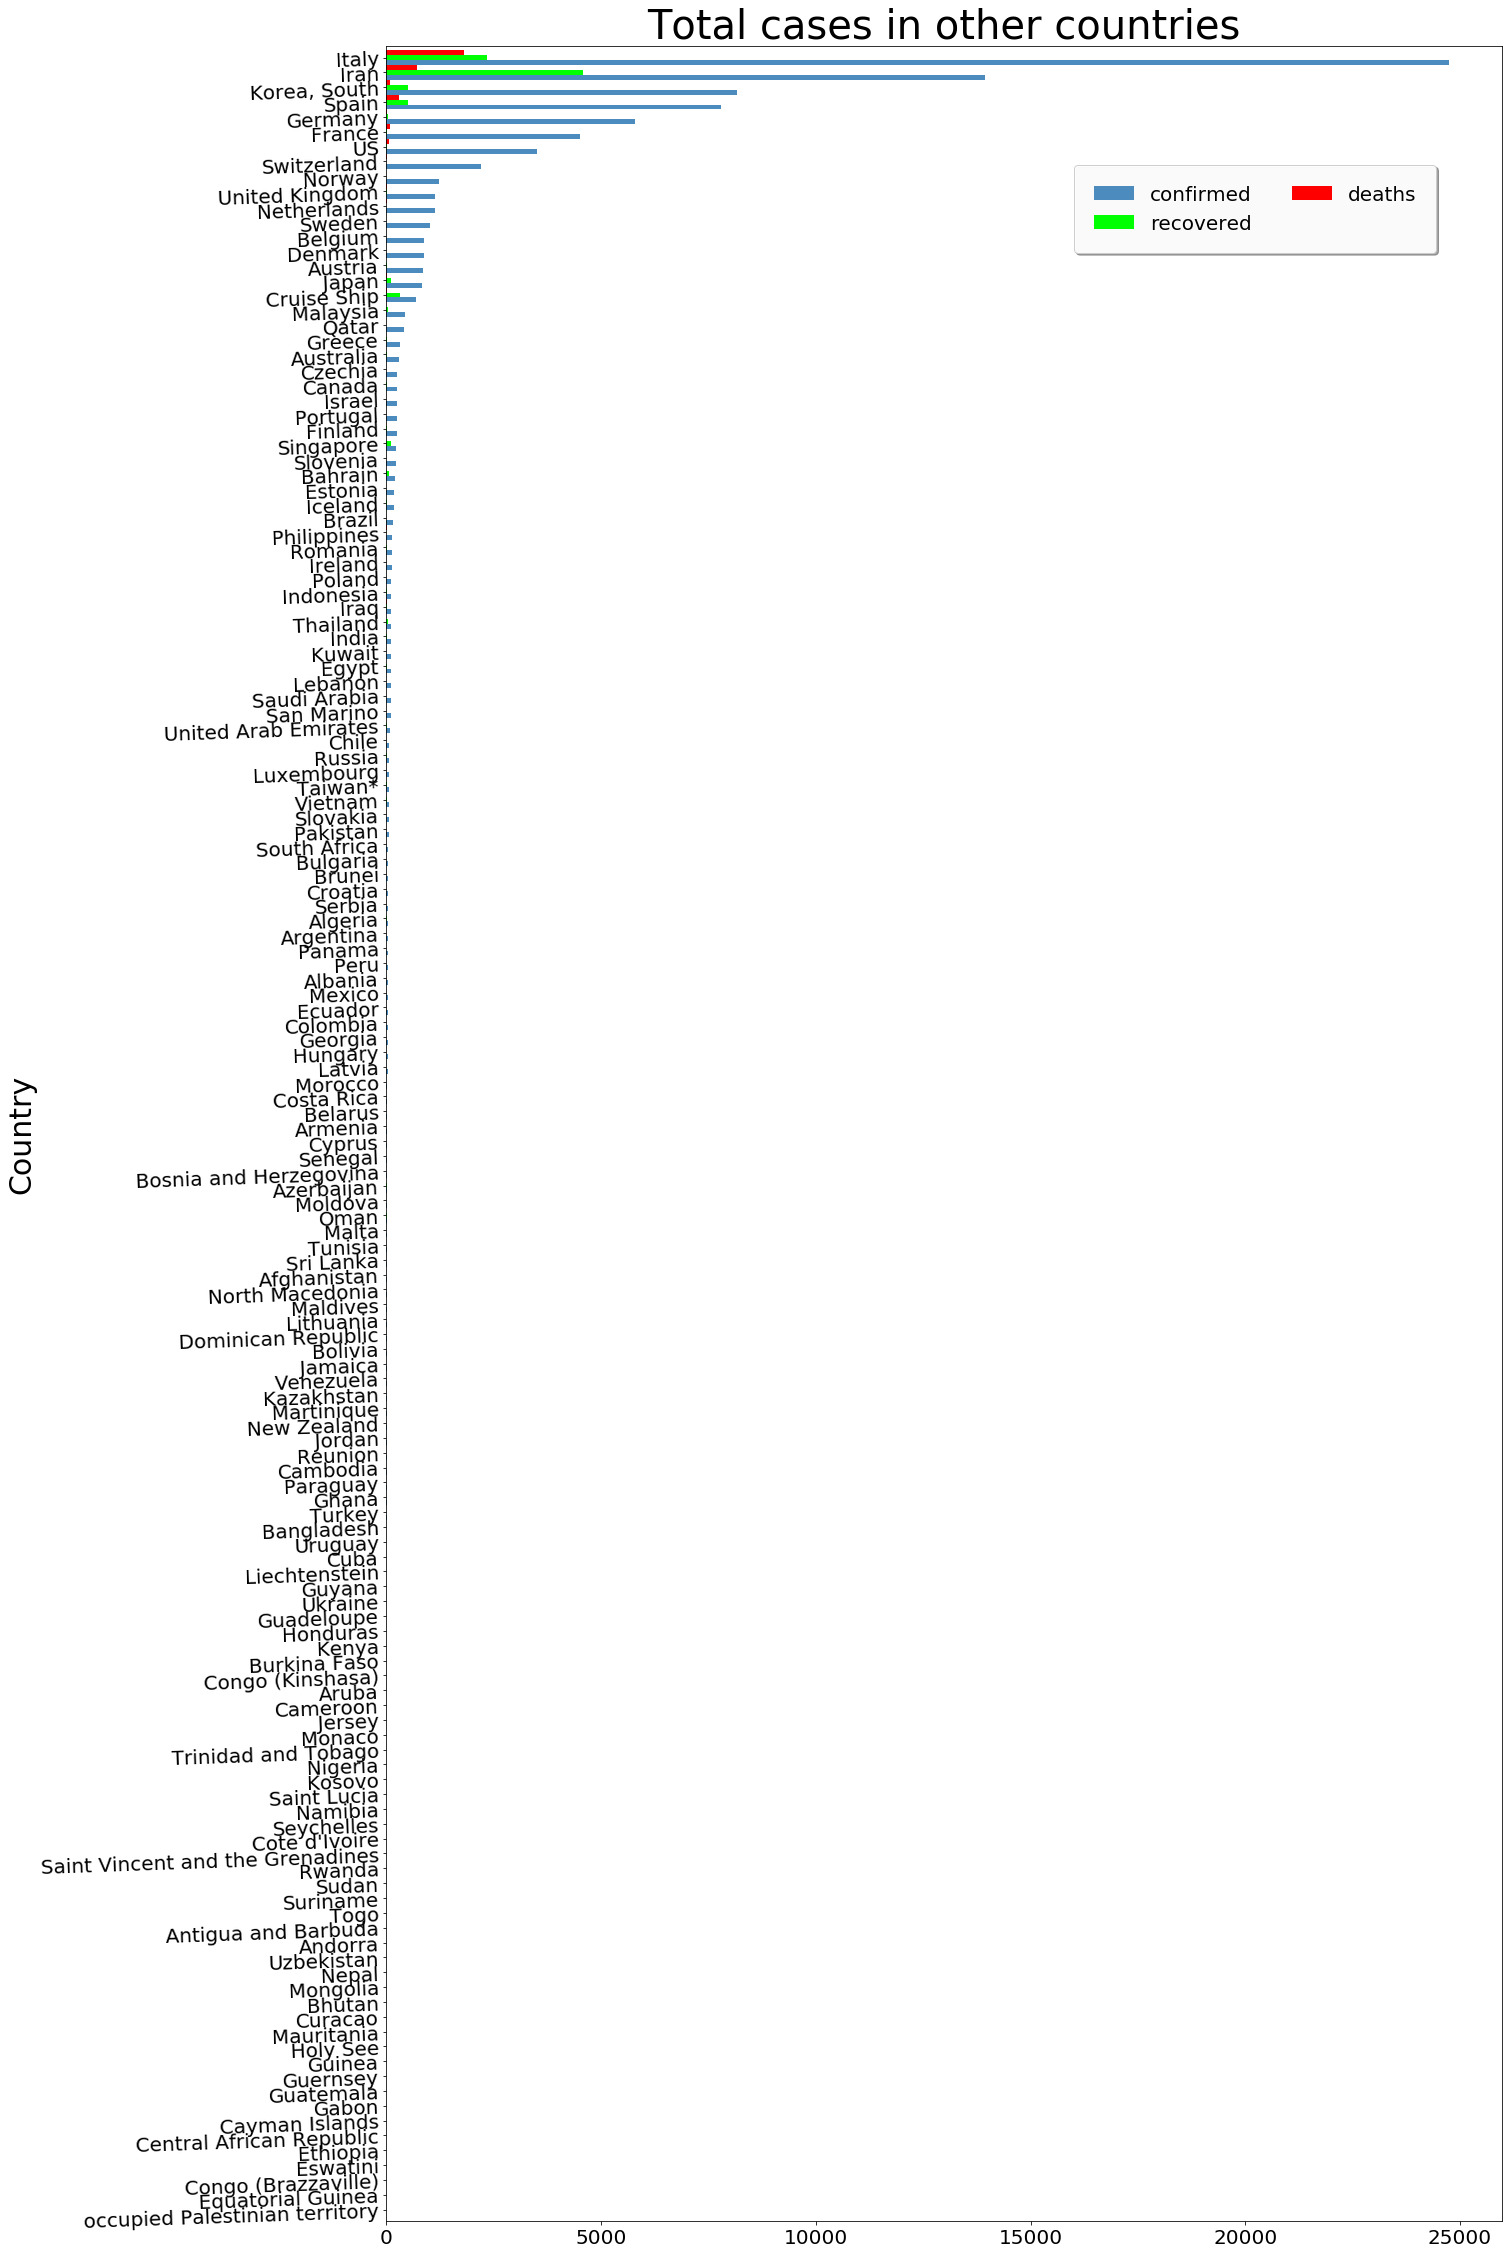

In [19]:
# creating the plot
other_countries.sort_values(by='confirmed',ascending=True).plot(kind='barh'
                                                                , figsize=(20,40)
                                                                , color = ['#4b8bbe','lime','red']
                                                                , width=1
                                                                , rot=2)

# defyning titles, labels, xticks and legend parameters
plt.title('Total cases in other countries', size=40)
plt.ylabel('Country',size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95)
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

In [20]:
# selecting cases by country that are located outside of China
other_countries_confirmed = df_confirmed[df_confirmed.columns[4:df_confirmed.shape[1]]][df_confirmed['Country/Region']!='China']
other_countries_confirmed = other_countries_confirmed.iloc[0:other_countries_confirmed.shape[0]].sum()

other_countries_recovered = df_recovered[df_recovered.columns[4:df_recovered.shape[1]]][df_recovered['Country/Region']!='China']
other_countries_recovered = other_countries_recovered.iloc[0:other_countries_recovered.shape[0]].sum()

other_countries_deaths = df_death[df_death.columns[4:df_death.shape[1]]][df_death['Country/Region']!='China']
other_countries_deaths = other_countries_deaths.iloc[0:other_countries_deaths.shape[0]].sum()

In [21]:
# creating a list with confirmed, recovered and deaths cases
list_of_tuples = list(zip(other_countries_confirmed, other_countries_recovered, other_countries_deaths)) 

# creating a dataframe with this list to plot the chart
other_countries_cases_growth = pd.DataFrame(list_of_tuples, index = other_countries_confirmed.index, columns = ['confirmed', 'recovered','deaths'])

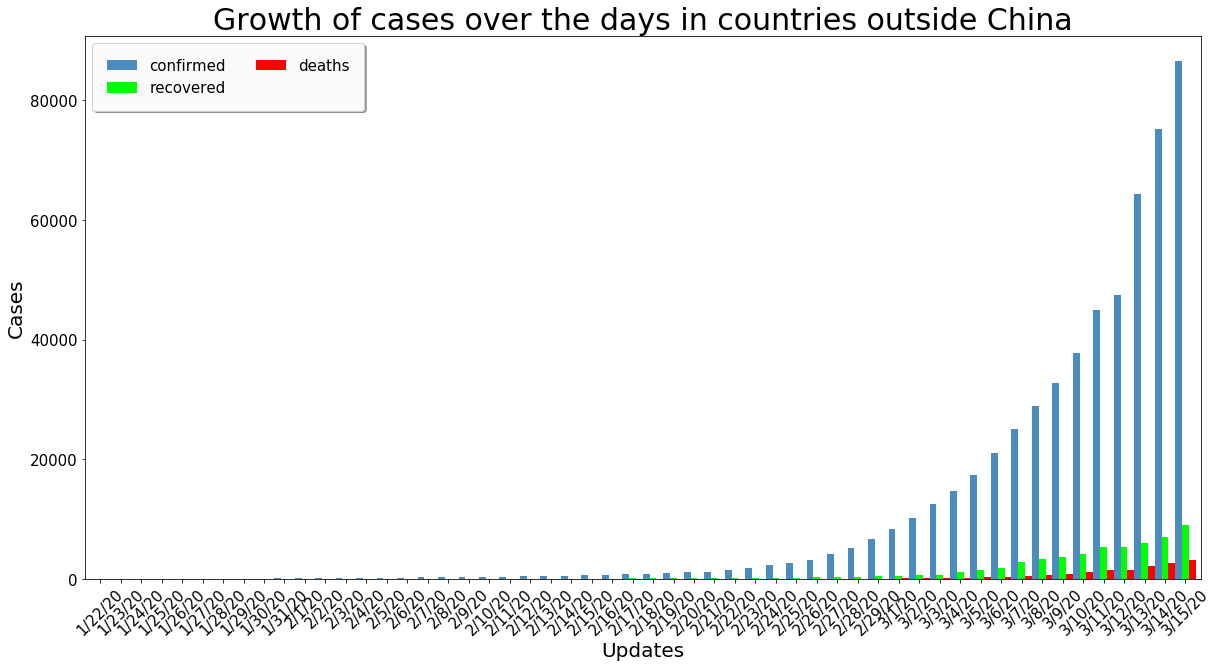

In [23]:
# creating the plot
other_countries_cases_growth.plot(kind='bar'
                                  , figsize=(20,10)
                                  , width=1
                                  , color=['#4b8bbe','lime','red']
                                  , rot=2)

# defyning title, labels, ticks and legend parameters
plt.title('Growth of cases over the days in countries outside China', size=30)
plt.xlabel('Updates', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

## Some Countries in South America

In [24]:
# taking cases in Ecuador
ecuador = other_countries[other_countries.index=="Ecuador"]
ecuador = ecuador.iloc[0]

# taking cases in Colombia
brasil = other_countries[other_countries.index=="Brazil"]
brasil = brasil.iloc[0]

# taking cases in Venezuela
chile = other_countries[other_countries.index=="Chile"]
chile = chile.iloc[0]

# taking cases in Peru
peru = other_countries[other_countries.index=="Peru"]
peru = peru.iloc[0]

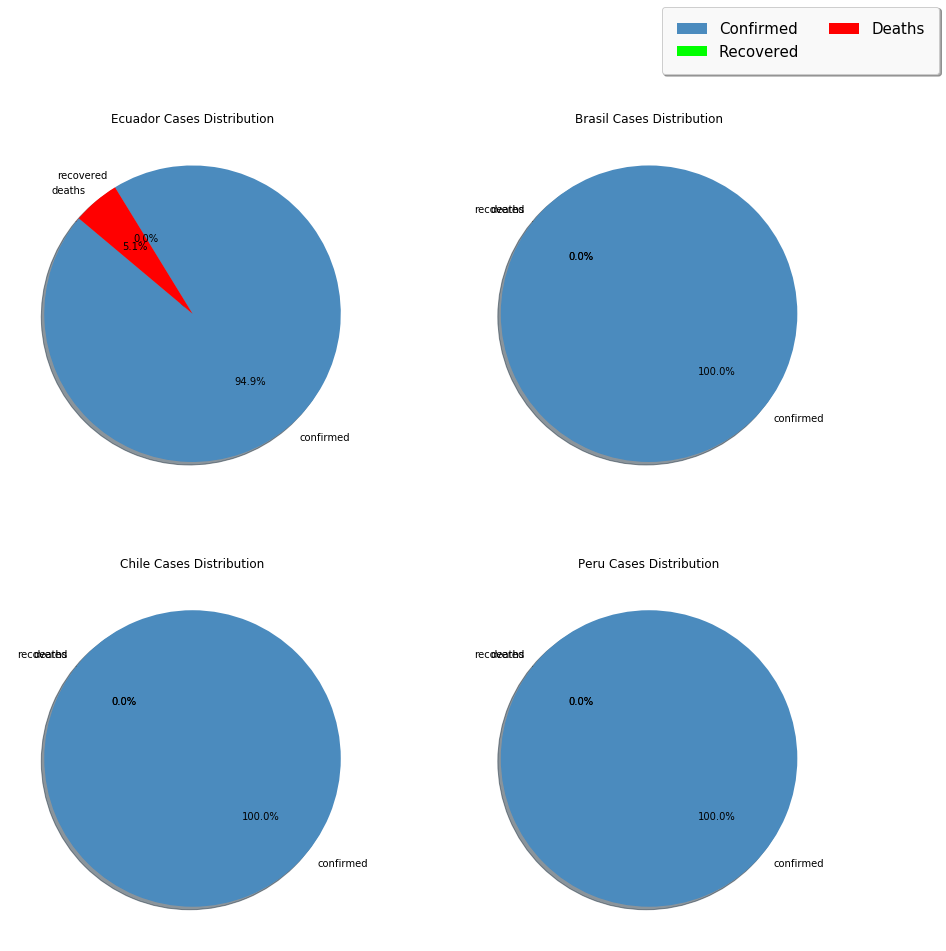

In [25]:
fig, axes = plt.subplots(
                     ncols=2,
                     nrows=2,
                     figsize=(15, 15))

ax1, ax2, ax3, ax4 = axes.flatten()

ax1.pie(ecuador
        , colors=['#4b8bbe','lime','red']
        , autopct='%1.1f%%' # adding percentagens
        , labels=['confirmed','recovered','deaths']
        , shadow=True
        , startangle=140)
ax1.set_title("Ecuador Cases Distribution")

ax2.pie(brasil
           , colors=['#4b8bbe','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['confirmed','recovered','deaths']
           , shadow=True
           , startangle=140)
ax2.set_title("Brasil Cases Distribution")

ax3.pie(chile
           , colors=['#4b8bbe','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['confirmed','recovered','deaths']
           , shadow=True
           , startangle=140)
ax3.set_title("Chile Cases Distribution")

ax4.pie(peru
           , colors=['#4b8bbe','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['confirmed','recovered','deaths']
           , shadow=True
           , startangle=140)
ax4.set_title("Peru Cases Distribution")

fig.legend(['Confirmed','Recovered','Deaths']
           , loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

plt.show()